In [79]:
from scipy.stats import norm, gmean
import numpy as np
import math
from numba import jit, prange
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from itertools import combinations
import pandas as pd

# Структурные продукты с полной защитой капитала

## СП с использованием азиатских опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется рост акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона call.

In [97]:
def Geometric_Average_Rate_Call(S, K , T , r , b , sigma):
  sigmaA = sigma/np.sqrt(3)
  bA = (b - sigma**2/6)/2
  d1 = (np.log(S/K)+(bA + sigmaA**2/2)*T)/(sigmaA*np.sqrt(T))
  d2 = d1 - sigmaA * np.sqrt(T)
  return S * np.exp((bA - r)*T) * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

S = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3

print ('Геометрическая среднее. Стоимость азиатского опциона колл =', Geometric_Average_Rate_Call(S , K , T , r , r-q , sigma))
# 7.906075677449117

Геометрическая среднее. Стоимость азиатского опциона колл = 7.906075677449117


## Задача

Задача. В услових примера вычислите коэффициент участия.

Ответ: 85%

In [100]:

INIT = 0.1 
present_value = INIT * np.exp(-r * T)
print(f"Present Value of Capital Guarantee (PV) = {present_value:.2f} rubles.")
option_investment = INIT - present_value
print(f"Amount Available for Option Purchase = {option_investment:.2f} rubles.")
option_price = Geometric_Average_Rate_Call(S, K, T, r, r - q, sigma)
print(f"Price of One Asian Call Option = {option_price:.6f} rubles.")
number_of_options = option_investment / option_price
print(f"Number of Options Purchased = {number_of_options:.2f} units.")
total_exposure = number_of_options * S
print(f"Total Exposure to Underlying Asset = {total_exposure:.2f} rubles.")
participation_rate = (total_exposure / INIT) * 100
print(f"Participation Rate (PR) = {participation_rate:.1f}%")


Present Value of Capital Guarantee (PV) = 0.09 rubles.
Amount Available for Option Purchase = 0.01 rubles.
Price of One Asian Call Option = 7.906076 rubles.
Number of Options Purchased = 0.00 units.
Total Exposure to Underlying Asset = 0.09 rubles.
Participation Rate (PR) = 85.5%


## Задача

Задача. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется падение акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона put.

Постройте графики выплат для опциона колл и пут. Сделайте выводы.

Present Value of Capital Guarantee (PV) = 0.09 RUB.
Amount Available for Option Purchase = 0.01 RUB.
Price of One Geometric Average Rate Put Option = 5.306411 RUB.
Number of Put Options to Purchase = 0.00 units.
Total Exposure to Underlying Asset (Put) = 0.13 RUB.
Participation Rate (PR) for Put Option = 127.4%
Price of One Geometric Average Rate Call Option = 7.906076 RUB.
Number of Call Options to Purchase = 0.00 units.
Total Exposure to Underlying Asset (Call) = 0.09 RUB.
Participation Rate (PR) for Call Option = 85.5%


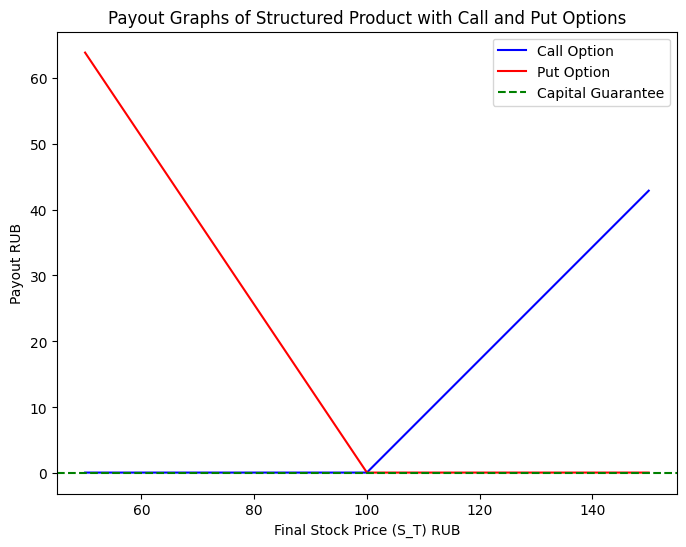

In [82]:


def Geometric_Average_Rate_Put(S, K, T, r, b, sigma):

    sigmaA = sigma / np.sqrt(3)
    bA = (b - (sigma ** 2) / 6) / 2
    d1 = (np.log(S / K) + (bA + (sigmaA ** 2) / 2) * T) / (sigmaA * np.sqrt(T))
    d2 = d1 - sigmaA * np.sqrt(T)
    option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp((bA - r) * T) * norm.cdf(-d1)
    return option_price




PV = INIT * np.exp(-r * T)
print(f"Present Value of Capital Guarantee (PV) = {PV:.2f} RUB.")


option_investment = INIT - PV
print(f"Amount Available for Option Purchase = {option_investment:.2f} RUB.")


option_put_price = Geometric_Average_Rate_Put(S, K, T, r, r - q, sigma)
print(f"Price of One Geometric Average Rate Put Option = {option_put_price:.6f} RUB.")


num_put_options = option_investment / option_put_price
print(f"Number of Put Options to Purchase = {num_put_options:.2f} units.")


total_put_exposure = num_put_options * S
print(f"Total Exposure to Underlying Asset (Put) = {total_put_exposure:.2f} RUB.")


PR_put = (total_put_exposure / INIT) * 100
print(f"Participation Rate (PR) for Put Option = {PR_put:.1f}%")

option_call_price = Geometric_Average_Rate_Call(S, K, T, r, r - q, sigma)
print(f"Price of One Geometric Average Rate Call Option = {option_call_price:.6f} RUB.")


num_call_options = option_investment / option_call_price
print(f"Number of Call Options to Purchase = {num_call_options:.2f} units.")


total_call_exposure = num_call_options * S
print(f"Total Exposure to Underlying Asset (Call) = {total_call_exposure:.2f} RUB.")

PR_call = (total_call_exposure / INIT) * 100
print(f"Participation Rate (PR) for Call Option = {PR_call:.1f}%")

S_T = np.linspace(50, 150, 500) 


call_payout = INIT * np.exp(r * T) + (total_call_exposure / INIT) * (S_T - K)
call_payout = np.maximum(call_payout, INIT)


put_payout = INIT * np.exp(r * T) + (total_put_exposure / INIT) * (K - S_T)
put_payout = np.maximum(put_payout, INIT)


plt.figure(figsize=(8, 6))
plt.plot(S_T, call_payout, label='Call Option', color='blue')
plt.plot(S_T, put_payout, label='Put Option', color='red')
plt.axhline(y=INIT, color='green', linestyle='--', label='Capital Guarantee')
plt.title('Payout Graphs of Structured Product with Call and Put Options')
plt.xlabel('Final Stock Price (S_T) RUB')
plt.ylabel('Payout RUB')
plt.legend()

plt.show()

## Задача

Задача. Проведите исследование и сравните влияние периодичности наблюдения (1 день, 1 неделя, 1 месяц) на
*   стоимость азиатского опциона,
*   волатильность.

Сделайте выводы, подкрепите выводы иллюстративными графиками.

In [83]:
def effective_volatility(sigma, N):
    return sigma * np.sqrt((2 * N + 1) / (6 * N))


def Geometric_Average_Rate_Call(S, K, T, r, b, sigma):
    sigmaA = sigma / np.sqrt(3)
    bA = (b - sigma**2 / 6) / 2
    d1 = (np.log(S / K) + (bA + sigmaA**2 / 2) * T) / (sigmaA * np.sqrt(T))
    d2 = d1 - sigmaA * np.sqrt(T)
    return S * np.exp((bA - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

S = 100 
K = 110 
T = 1  
r = 0.07  #
sigma = 0.3  
b = r  

frequencies = {"1 Day": 252, "1 Week": 52, "1 Month": 12}  # Approximate trading periods

volatility_results = []
option_values = []


for label, N in frequencies.items():

    sigmaA = effective_volatility(sigma, N)
    volatility_results.append((label, sigmaA))
    

    option_value = Geometric_Average_Rate_Call(S, K, T, r, b, sigmaA)
    option_values.append((label, option_value))


print("Effective Volatility for Each Observation Periodicity:")
for label, sigmaA in volatility_results:
    print(f"{label}: {sigmaA:.4f}")

print("\nAsian Call Option Value for Each Observation Periodicity:")
for label, option_value in option_values:
    print(f"{label}: {option_value:.4f}")

Effective Volatility for Each Observation Periodicity:
1 Day: 0.1734
1 Week: 0.1740
1 Month: 0.1768

Asian Call Option Value for Each Observation Periodicity:
1 Day: 1.6032
1 Week: 1.6150
1 Month: 1.6645


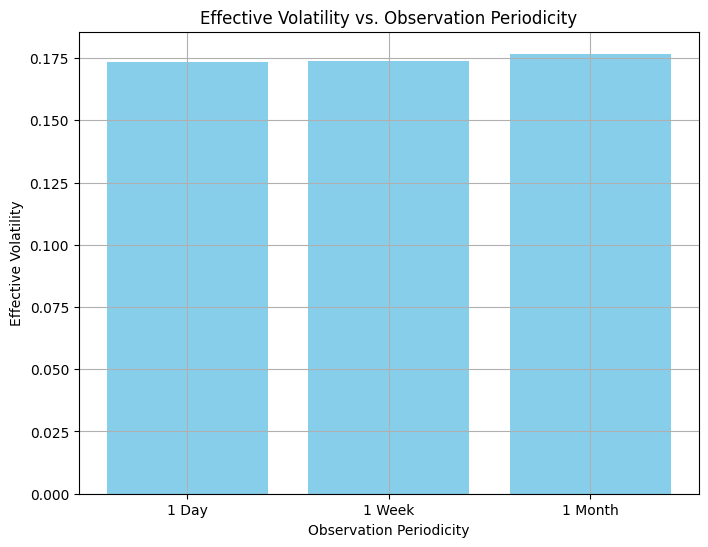

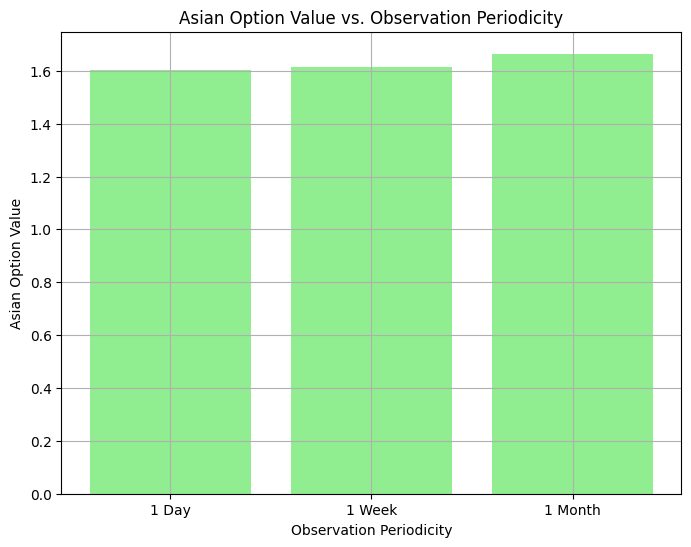

In [84]:

labels = [item[0] for item in volatility_results]
volatilities = [item[1] for item in volatility_results]
option_prices = [item[1] for item in option_values]


plt.figure(figsize=(8, 6))
plt.bar(labels, volatilities, color='skyblue')
plt.title("Effective Volatility vs. Observation Periodicity")
plt.ylabel("Effective Volatility")
plt.xlabel("Observation Periodicity")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(labels, option_prices, color='lightgreen')
plt.title("Asian Option Value vs. Observation Periodicity")
plt.ylabel("Asian Option Value")
plt.xlabel("Observation Periodicity")
plt.grid(True)
plt.show()


Пример 2. Оцените стоимость азиатского опциона колл с использованием метода Монте-Карло. При условиях цена базового актива и страйк 100, дата экспирации через 1 год, безрисковая ставка 7%, волатильность 30%. Переодичность наблюдений - 1 день, количество траекторий 1000.

In [85]:
# Box-Muller transform to generate normal deviates
def getGaussian(mu, sigma, n):

	# Generate a pair of uniform random variables U,V
  U = np.random.uniform(0, 1, n)
  V = np.random.uniform(0, 1, n)

  # Get R~Exponential(1) and Theta~Uniform(0, 2pi) random variables
  R     = -np.log(U)
  Theta = 2*np.pi*V

	# Transform to X and Y
  X = np.multiply(np.sqrt(2*R), np.cos(Theta))
  Y = np.multiply(np.sqrt(2*R), np.sin(Theta))

  # Perform location-scale transform
  X = mu + sigma*X
  Y = mu + sigma*Y
  return X, Y

In [86]:
def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
  S = []
  delta_t = T/n
  # Mean and variance of a lognormal random walk
  mean = S0 * np.exp((mu+(0.5*sigma**2))*T)
  variance = (S0 ** 2)*np.exp(2*mu*T + 2*(sigma ** 2)*T)*(np.exp(sigma**2)*T-1)
  for i in range(noOfPaths):
    X, Y = getGaussian(0, 1, n)
    dz_t = X
    dW_t = np.sqrt(delta_t) * dz_t
    dX_t = mu * delta_t + sigma * dW_t
    X_t = np.cumsum(dX_t)
    S_t = S0 * np.exp(X_t)
    S.append(S_t)
  S = np.array(S)
  return S, mean, variance

In [87]:
S0    = 100

noOfPaths = 1000
T = 1
n = 250

K = 100
r = 0.07

sigma = 0.3
mu = r - (0.5*sigma**2)

In [88]:
# Simulate a lognormal random walk
S, mean, variance = gbm_mcs(mu, sigma, S0, T, n, noOfPaths)
c = 0.0
for i in range(noOfPaths):
  c = c + max(np.mean(S[i]) - K, 0)
disc = np.exp(-r*T)
#c = disc * (c/noOfPaths)
print ('Монте-Карло моделирование. Стоимость азиатского опциона колл =', disc * (c/noOfPaths))
#print(c)

Монте-Карло моделирование. Стоимость азиатского опциона колл = 7.720987319496158


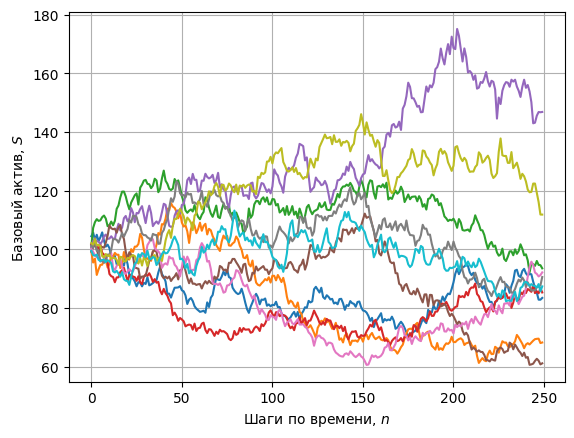

In [89]:
import matplotlib.pyplot as plt

time = list(range(n))
for i in range(10):
  plt.plot(time, S[i])

plt.xlabel('Шаги по времени, $n$')
plt.ylabel('Базовый актив, $S$')
plt.grid(True)
plt.show()

## Задача

Задача. Переписать цикл for и избавиться от использования констант (использовать переменную step).

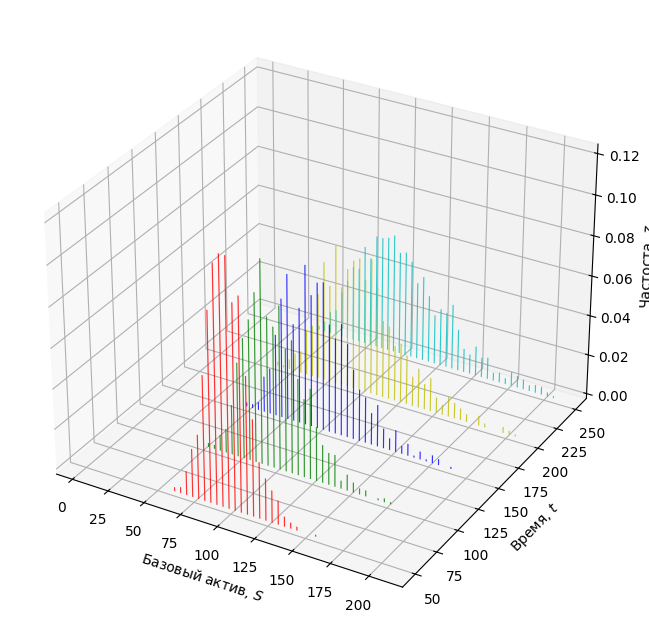

In [90]:
from mpl_toolkits.mplot3d import Axes3D

sd = np.sqrt(variance)
step = 50

# Density plot of the underlying price
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111,projection='3d')
x   = np.linspace(mean-3*sd, mean+3*sd, step+1)

#time = list(range(n))

for i,c in zip([50,100,150,200,250],['r','g','b','y','c']):
  hist, bins = np.histogram(S[:,i-1],bins = x)
  hist = hist/noOfPaths
  cs = [c] * 50
  ax.bar(x[:-1],hist, i, zdir = 'y', color=cs,alpha=0.8)

ax.set_xlabel('Базовый актив, $S$')
ax.set_ylabel('Время, $t$')
ax.set_zlabel('Частоста, $z$')

plt.show()

## Задача

Задача. Проверить гипотезу о том, что на разных временных шагах гистограммы принадлежат одному распределению.

In [91]:

sd = np.sqrt(variance)
step_size = 50
steps = list(range(step_size, n + 1, step_size))
colors = ['r', 'g', 'b', 'y', 'c']

def perform_ks_test(S, step1, step2):

    data1 = S[:, step1 - 1]
    data2 = S[:, step2 - 1]
    statistic, p_value = ks_2samp(data1, data2)
    reject_null = p_value < 0.05
    return {
        'Step1': step1,
        'Step2': step2,
        'KS Statistic': statistic,
        'p-value': p_value,
        'Reject H0': reject_null
    }


step_combinations = list(combinations(steps, 2))


ks_results = []
for step1, step2 in step_combinations:
    result = perform_ks_test(S, step1, step2)
    ks_results.append(result)


df_ks = pd.DataFrame(ks_results)





In [92]:
df_ks

,Step1,Step2,KS Statistic,p-value,Reject H0
0,50,100,0.111,8.744524e-06,True
1,50,150,0.157,3.606666e-11,True
2,50,200,0.169,6.977595e-13,True
3,50,250,0.189,5.032549e-16,True
4,100,150,0.069,1.709015e-02,True
5,100,200,0.090,6.029006e-04,True
6,100,250,0.119,1.378745e-06,True
7,150,200,0.042,3.411248e-01,False
8,150,250,0.084,1.716214e-03,True
9,200,250,0.052,1.338527e-01,False


Пример.
В условиях примера 1

1. Вычислите  результаты от инвестирования используя
формулу выплаты:
$$
r_{SP} =
\max\left( r_{SP \min}, r_{SP \min} + PR \times \frac{P_{avg} - S}{S}\right),
$$
здесь $\frac{P_{avg} - S}{S}$ -- доходность базового актива относительно среднего значения $P_{avg}$, $S$ -- цена начала участия, или страйк встроенных опционов (в
простейшем случае он равен цене спот базового актива на момент выпуска продукта, т.е. $P_0$).

2. Постройте продукт со встроенным азиатским опционом, оцененным методом Монте-Карло. Для уменьшения разброса в качестве control variate использовать геометрическое усреднение. Вычислите доверительный интервал.

3. Сравните полученные результаты с результатами предыдущих задач и подкрепите выводы иллюстративными графиками.

In [ ]:
def bs_call_exact(t, s0, k, r, sigma):
    dp = 1 / ( sigma * math.sqrt( t ) ) * ( math.log( s0 / k ) + ( r + sigma**2 / 2) * ( t ) )
    dm = dp - sigma * math.sqrt( t )
    return s0 * norm.cdf(dp) - k * math.exp( - r * t ) * norm.cdf(dm)

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

@jit(nopython=True, inline = 'always')
def wiener(t):
    return math.sqrt( t ) * np.random.normal(0, 1)

@jit(nopython=True, inline = 'always')
def st(t, s0, r, sigma):
    return s0 * math.exp( ( r - sigma**2 / 2) * t + sigma * wiener( t ) )

@jit(parallel=True, nopython=False)
def asian_bs_call_mc_geom(n_iters, T, t_steps, S0, K, r, sigma):
    payoff = np.zeros(n_iters)
    avg_S = np.zeros(n_iters)
    m = len(t_steps)
    for i in prange(0, n_iters):
        geom_avg_s = 0
        S0_j = S0
        for j in range(1, m):
            S_j = st( (t_steps[j] - t_steps[j-1] ) * T, S0_j, r, sigma)
            S0_j = S_j
            geom_avg_s += math.log(S_j)
        geom_avg_s = math.exp(geom_avg_s / ( m - 1))
        avg_S[i] = geom_avg_s
        payoff[i] = math.exp(-r * T) * max(geom_avg_s - K , 0)
    return payoff, avg_S

In [ ]:
N_MC = int(10**5)
T, S0, K, r, sigma = 1, 100, 100, 0.07, 0.3
m = 1000
t_steps = np.array([i/m for i in range(0, m + 1)])
payoff_data, S_data = asian_bs_call_mc_geom(N_MC, T, t_steps, S0, K, r, sigma)
asian_call = np.mean(payoff_data)
print(f"asian call = {asian_call:.4f} +- {1.96 / math.sqrt(n) * np.std(payoff_data):.4f} with 95% prob")

asian call = 7.9275 +- 1.4439 with 95% prob


In [ ]:
N = 100000

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / asian_call
PR_1 = K * Q_1/ N
S_1 = np.sort(S_data)
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_1 - S0) / S0 )

print(f"asian call r_sp_mean = {np.mean(r_sp_1)}, PR = {PR_1}")

asian call r_sp_mean = 0.07250818125421636, PR = 0.8528032524183273


In [ ]:
european_call = bs_call_exact(T, S0, K, r, sigma)
Q_2 = (N - da) / european_call
PR_2 = K * Q_2/ N
S_2 = np.sort(np.array([st(T, S0, r, sigma) for i in range(0, N_MC)]))
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_2 - S0) / S0 )

print(f"european call r_sp_mean = {np.mean(r_sp_2)}, PR = {PR_2}")

european call r_sp_mean = 0.07257420850733629, PR = 0.44447044652333806


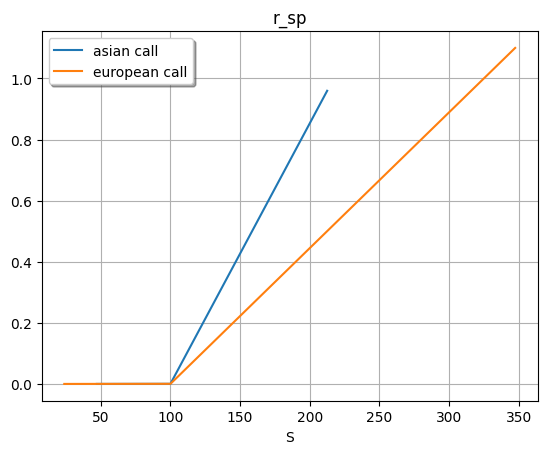

In [ ]:
plt.plot(S_1, r_sp_1, label = 'asian call')
plt.plot(S_2, r_sp_2, label = 'european call')

plt.title('r_sp')
plt.xlabel('S')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

In [ ]:
S0 = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3
call_price = Geometric_Average_Rate_Call(S0, K , T , r , r-q , sigma)
print ('Geometric average rate call =', call_price)

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Participation rate = ', PR)

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S.mean(axis=1).mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Geometric average rate call = 7.906075677449117
Participation rate =  0.855
Rsp averaged over 1000 samples = 2.95%


In [ ]:
# task 2 evaluate asian option price using MC method
import scipy.stats

print('Наблючений:', S.shape)
# geometric averaging
S_means = np.prod(S**(1/S.shape[1]), axis=1)
payoffs = np.exp(-r * T) * np.maximum(S_means - K, 0)
avg_payoff = np.mean(payoffs)
std_error = np.sqrt(np.sum((payoffs - avg_payoff)**2) / (payoffs.shape[0] - 1))
print('Среднее значание функции выплат = ', round(avg_payoff,3))
print('Стандартная ошибка = ', round(std_error, 3))
scaler = scipy.stats.t.ppf((1 + 0.95) / 2., payoffs.shape[0] - 1)
print(f'Доверительный интервал : [{avg_payoff - std_error * scaler:.3f}(0):{avg_payoff + std_error * scaler:.3f}]')

Наблючений: (1000, 250)
Среднее значание функции выплат =  7.863
Стандартная ошибка =  11.634
Доверительный интервал : [-14.968(0):30.694]


In [ ]:
# task 3 compare results

print('Analytical Geometric average rate call =', round(call_price, 3))
print('Relative error for MC method = ', round(abs(call_price - avg_payoff) / call_price * 100, 3), '%\n')

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

call_price = call(S0, K , T , sigma , r, q)
print ('Стоимость опциона колл =', round(call_price, 3))

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Коэффициент участия = ', PR * 100, '%')

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S[:, -1].mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Analytical Geometric average rate call = 15.211
Relative error for MC method =  48.306 %

Стоимость опциона колл = 15.211
Коэффициент участия =  44.4 %
Rsp averaged over 1000 samples = 3.34%


Text(0.5, 0, 'Price S_T')

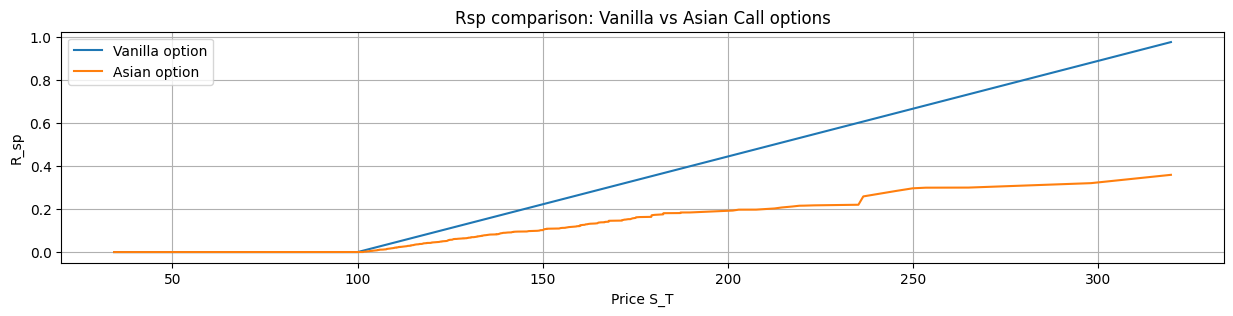

In [ ]:
# profit plots
plt.figure(figsize=(15,3))
plt.title('Rsp comparison: Vanilla vs Asian Call options')
rsps = np.maximum(rsp_min, rsp_min + PR * (S[:, -1] - S0)/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps), label='Vanilla option')
rsps2 = np.maximum(rsp_min, rsp_min + PR * payoffs/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps2), label='Asian option')
plt.legend();plt.grid()
plt.ylabel('R_sp')
plt.xlabel('Price S_T')
# according to that payoff for an asian option is dependent on average asset price during the history
# the profit for this product is growth much slower than the one for vanilla option
# but
# it's not necessary has profit starting from price = S0 as below since we plotted only last price
# not average one, so actually it's possible to have positive pnl starting from price much lower

# Задача

Сравните различные методы оценивания (арифметический и Монте-Карло) азиатского опциона для бездивидентных акций:
$S_0= 116,79$, $К= 117$, срок погашения составляет 3 месяца. Волатильность акций составляет 0,02803, а безрисковый процент составляет 0,624% с непрерывным начислением процентов.


https://github.com/olof98johansson/FinancialOptionsModelling

https://webthesis.biblio.polito.it/20278/1/tesi.pdf

In [40]:

S0 = 116.79  
K = 117  
sigma = 0.02803 
r = 0.00624  
T = 0.25  
n_paths = 1000  
n_steps = 2520  

dt = T / n_steps  


def geometric_asian_option(S0, K, r, sigma, T):
    sigma_geo = sigma * np.sqrt((2 * n_steps + 1) / (6 * n_steps))
    r_geo = 0.5 * (r - 0.5 * sigma**2) + 0.5 * sigma**2
    d1 = (np.log(S0 / K) + (r_geo + 0.5 * sigma_geo**2) * T) / (sigma_geo * np.sqrt(T))
    d2 = d1 - sigma_geo * np.sqrt(T)
    price = S0 * np.exp(-r * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return price


np.random.seed(42)
Z = np.random.normal(0, 1, (n_paths, n_steps))
S = np.zeros((n_paths, n_steps + 1))
S[:, 0] = S0

for t in range(1, n_steps + 1):
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t - 1])


P_avg = np.mean(S[:, 1:], axis=1) 
G_avg = np.exp(np.mean(np.log(S[:, 1:]), axis=1)) 


payoff_arith = np.maximum(P_avg - K, 0)
payoff_geo = np.maximum(G_avg - K, 0)

arith_price = np.exp(-r * T) * np.mean(payoff_arith)
geo_monte_price = np.exp(-r * T) * np.mean(payoff_geo)


geo_analytical_price = geometric_asian_option(S0, K, r, sigma, T)

# Результаты
print(f"Аналитическая цена геометрического азиатского опциона: {geo_analytical_price:.4f}")
print(f"Monte Carlo (геометрическое): {geo_monte_price:.4f}")
print(f"Monte Carlo (арифметическое): {arith_price:.4f}")


Аналитическая цена геометрического азиатского опциона: 0.2792
Monte Carlo (геометрическое): 0.3103
Monte Carlo (арифметическое): 0.3112


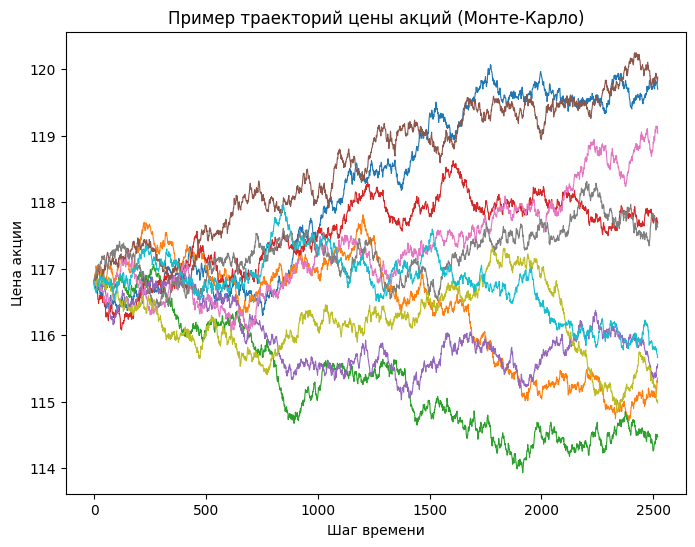

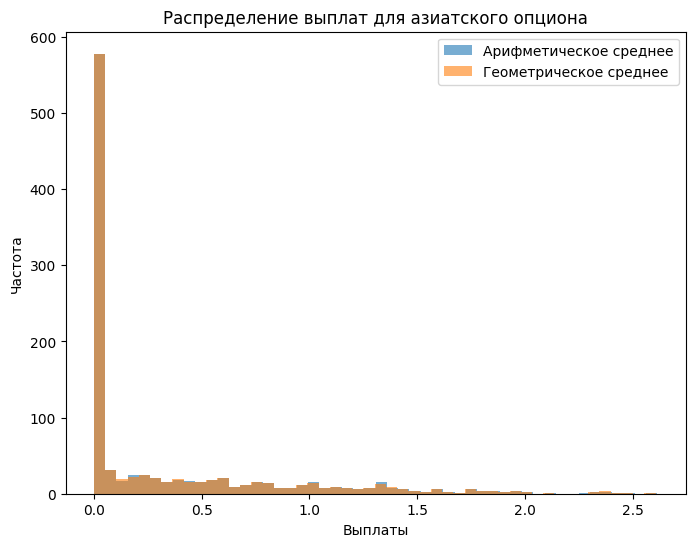

In [43]:
plt.figure(figsize=(8, 6))
for i in range(10):  
    plt.plot(S[i, :], lw=0.8)
plt.title("Пример траекторий цены акций (Монте-Карло)")
plt.xlabel("Шаг времени")
plt.ylabel("Цена акции")

plt.show()


plt.figure(figsize=(8, 6))
plt.hist(payoff_arith, bins=50, alpha=0.6, label="Арифметическое среднее")
plt.hist(payoff_geo, bins=50, alpha=0.6, label="Геометрическое среднее")
plt.title("Распределение выплат для азиатского опциона")
plt.xlabel("Выплаты")
plt.ylabel("Частота")
plt.legend()
plt.show()


# Структурные продукты без гарантии возврата капитала

## Задача.

Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается рост цен на акции «A».  Клиент готов нести 30\% потери в случае падении цены акции <<А>> (меньше чем при прямой покупке акции) в обмен на увеличение коэффициента участия. Текущая цена акции 100 руб.

Входные параметры продукта:
*   базовый актив -- акции,
*   срок -- $T = 1$ год,
*   цена начала участия -- $P_0 = 100$рублей,
*   барьерная цена (тип барьера) -- «включаемый» (knock-in) и «выключаемый» (knock-out),
*   условия наблюдения с целью определения пробития барьера -- частота
наблюдений, длина периода наблюдений, расположение периода наблюдений
в случае, если оно частичное – в начале, середине, конце срока продукта;
*   сценарий поведения базового актива -- рост.

Выходной параметр продукта:
*   коэффициент участия.


Проведите расчеты и вычислите коэффициент участия.

In [48]:
S0 = 100 
K = 100  
barrier_knock_in = 110  
barrier_knock_out = 90  
r = 0.07  
sigma = 0.3  
T = 1  
initial_capital = 0.1 * 10**6 
loss_limit = 0.3  
n_paths = 10000 
n_steps = 252  
dt = T / n_steps  


In [49]:

np.random.seed(42)
Z = np.random.normal(0, 1, (n_paths, n_steps))
S = np.zeros((n_paths, n_steps + 1))
S[:, 0] = S0

for t in range(1, n_steps + 1):
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t - 1])


knock_in = np.any(S >= barrier_knock_in, axis=1)  
knock_out = np.any(S <= barrier_knock_out, axis=1) 

valid_paths = knock_in & ~knock_out  
S_filtered = S[valid_paths]


In [50]:

PV = initial_capital * 0.7 / np.exp(r * T)

F_option = initial_capital - PV
payoffs = np.maximum(S_filtered[:, -1] - K, 0)  
option_price = np.exp(-r * T) * np.mean(payoffs)  
PR = F_option / (option_price * len(S_filtered))
print(f"Коэффициент участия (PR): {PR:.2%}")


Коэффициент участия (PR): 34.25%


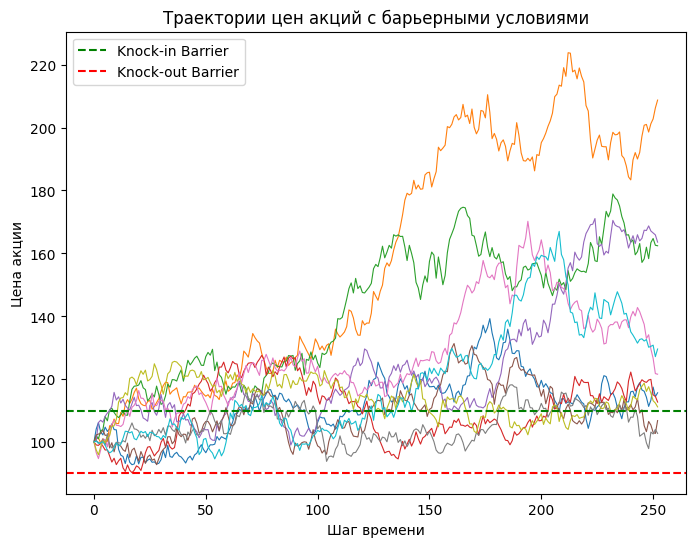

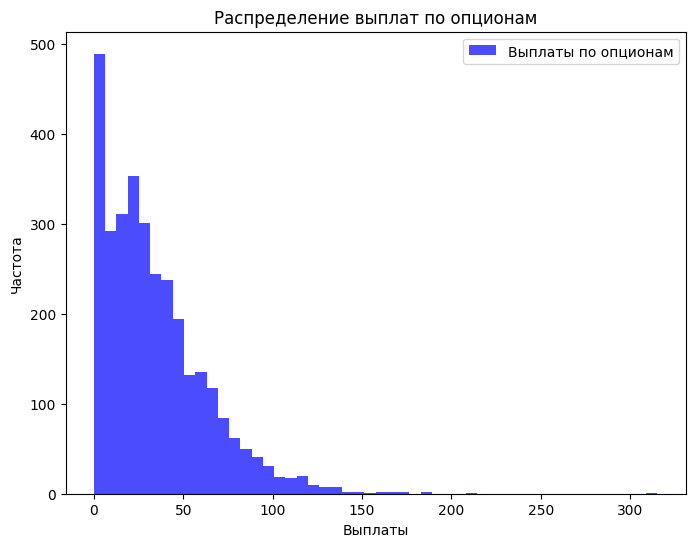

In [51]:

plt.figure(figsize=(8, 6))
for i in range(10): 
    plt.plot(S_filtered[i, :], lw=0.8)
plt.axhline(barrier_knock_in, color='green', linestyle='--', label='Knock-in Barrier')
plt.axhline(barrier_knock_out, color='red', linestyle='--', label='Knock-out Barrier')
plt.title("Траектории цен акций с барьерными условиями")
plt.xlabel("Шаг времени")
plt.ylabel("Цена акции")
plt.legend()

plt.show()

plt.figure(figsize=(8, 6))
plt.hist(payoffs, bins=50, alpha=0.7, color='blue', label='Выплаты по опционам')
plt.title("Распределение выплат по опционам")
plt.xlabel("Выплаты")
plt.ylabel("Частота")
plt.legend()

plt.show()
